In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,VotingRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xg
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv("E:\\Practice datasets\\cancer_reg.csv", encoding='ISO-8859-1')


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [8]:
data[data.select_dtypes('object').columns]=data.select_dtypes('object').astype('category')

In [14]:
data[data.select_dtypes(np.number).columns]=data.select_dtypes(np.number).fillna(data.mean())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16504\3065390632.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data.select_dtypes(np.number).columns]=data.select_dtypes(np.number).fillna(data.mean())


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   avgAnnCount              3047 non-null   float64 
 1   avgDeathsPerYear         3047 non-null   int64   
 2   TARGET_deathRate         3047 non-null   float64 
 3   incidenceRate            3047 non-null   float64 
 4   medIncome                3047 non-null   int64   
 5   popEst2015               3047 non-null   int64   
 6   povertyPercent           3047 non-null   float64 
 7   studyPerCap              3047 non-null   float64 
 8   binnedInc                3047 non-null   category
 9   MedianAge                3047 non-null   float64 
 10  MedianAgeMale            3047 non-null   float64 
 11  MedianAgeFemale          3047 non-null   float64 
 12  Geography                3047 non-null   category
 13  AvgHouseholdSize         3047 non-null   float64 
 14  PercentM

In [16]:
data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


In [21]:
pd.set_option('display.max_columns', None)

In [39]:
fig=plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

In [26]:
data.drop(columns=['binnedInc','Geography'],inplace=True)

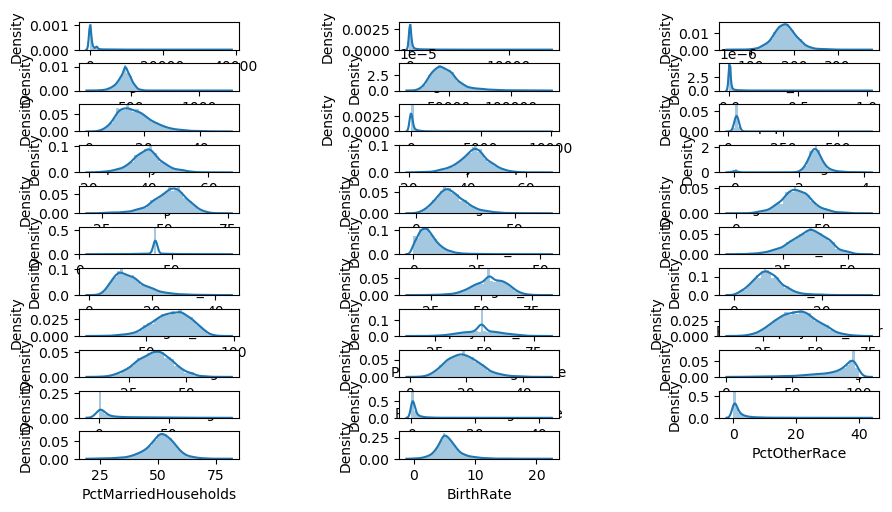

In [40]:
count=1
for i in data.columns:
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=1,hspace=0.5)
    fig,plt.subplot(15,3,count)
    sns.distplot(data[i],kde=True)
    count+=1
fig.tight_layout()
plt.show()

In [42]:
corrw=data.corrwith(data['TARGET_deathRate'])
corrw

avgAnnCount               -0.143532
avgDeathsPerYear          -0.090715
TARGET_deathRate           1.000000
incidenceRate              0.449432
medIncome                 -0.428615
popEst2015                -0.120073
povertyPercent             0.429389
studyPerCap               -0.022285
MedianAge                  0.004375
MedianAgeMale             -0.021929
MedianAgeFemale            0.012048
AvgHouseholdSize          -0.036905
PercentMarried            -0.266820
PctNoHS18_24               0.088463
PctHS18_24                 0.261976
PctSomeCol18_24           -0.094765
PctBachDeg18_24           -0.287817
PctHS25_Over               0.404589
PctBachDeg25_Over         -0.485477
PctEmployed16_Over        -0.397487
PctUnemployed16_Over       0.378412
PctPrivateCoverage        -0.386066
PctPrivateCoverageAlone   -0.326067
PctEmpPrivCoverage        -0.267399
PctPublicCoverage          0.404572
PctPublicCoverageAlone     0.449358
PctWhite                  -0.177400
PctBlack                   0

(<Figure size 2000x1500 with 0 Axes>, <AxesSubplot:>)

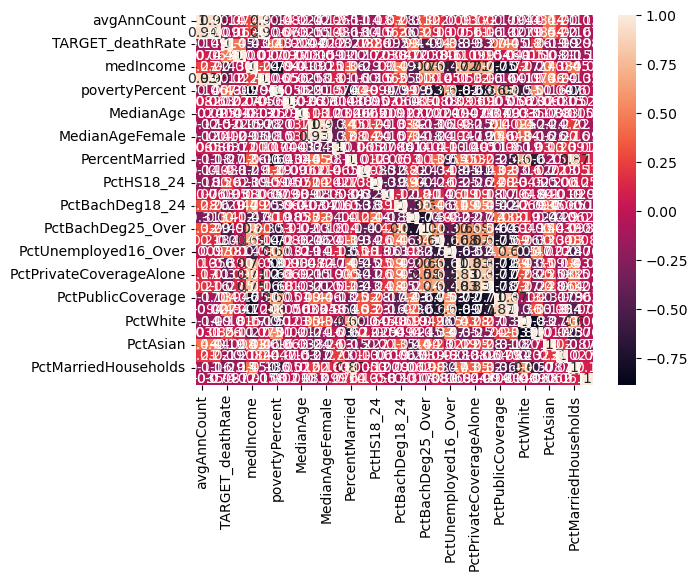

In [44]:
fig,sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

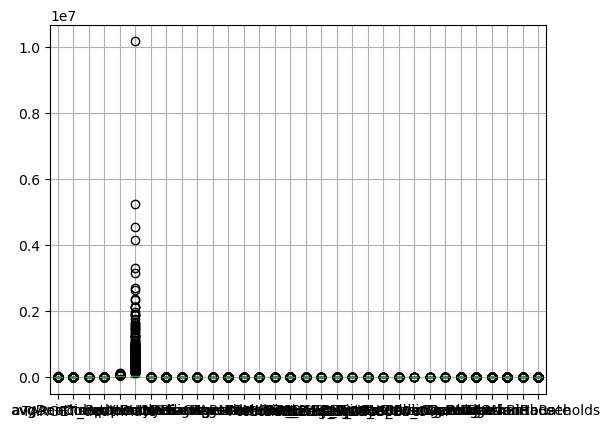

In [47]:
data.boxplot()

In [45]:
x=data.drop(columns=['TARGET_deathRate'])
y=data.TARGET_deathRate

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [48]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [49]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [50]:
model.score(X_train,y_train)

0.5350391469975144

In [51]:
linear_pred=model.predict(X_test)

In [52]:
r2_l=metrics.r2_score(y_test,linear_pred)

In [53]:
r2_l

0.4866828716432483

In [ ]:
# Decision tree

In [59]:
dt_model=DecisionTreeRegressor()

In [86]:
param_grid={'max_depth':range(2,20),'max_leaf_nodes':range(2,20)}

In [57]:
param_grid

{'max_depth': range(2, 20), 'max_leaf_nodes': range(2, 20)}

In [61]:
rand=RandomizedSearchCV(dt_model,param_grid,cv=5)

In [62]:
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': range(2, 20),
                                        'max_leaf_nodes': range(2, 20)})

In [63]:
rand.best_estimator_

DecisionTreeRegressor(max_depth=18, max_leaf_nodes=15)

In [64]:
dt_model1=DecisionTreeRegressor(max_depth=18, max_leaf_nodes=15)

In [65]:
dt_model1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, max_leaf_nodes=15)

In [66]:
dt_model1.score(X_train,y_train)

0.4984047197987971

In [70]:
def evaluate(y_test,pred):
    mse=metrics.mean_squared_error(y_test,pred)
    mae=metrics.mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mse)
    return mse,mae,rmse

In [68]:
pred=dt_model1.predict(X_test)

In [71]:
evaluate(y_test,pred)

(505.1450487184115, 17.004543286435233, 22.47543211416438)

In [105]:
def evaluate_model(model):
    print('Training accuracy',model.score(X_train,y_train))
    print('Testing accuacy',metrics.r2_score(y_test,pred))

In [101]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))

In [73]:
from sklearn.tree import plot_tree

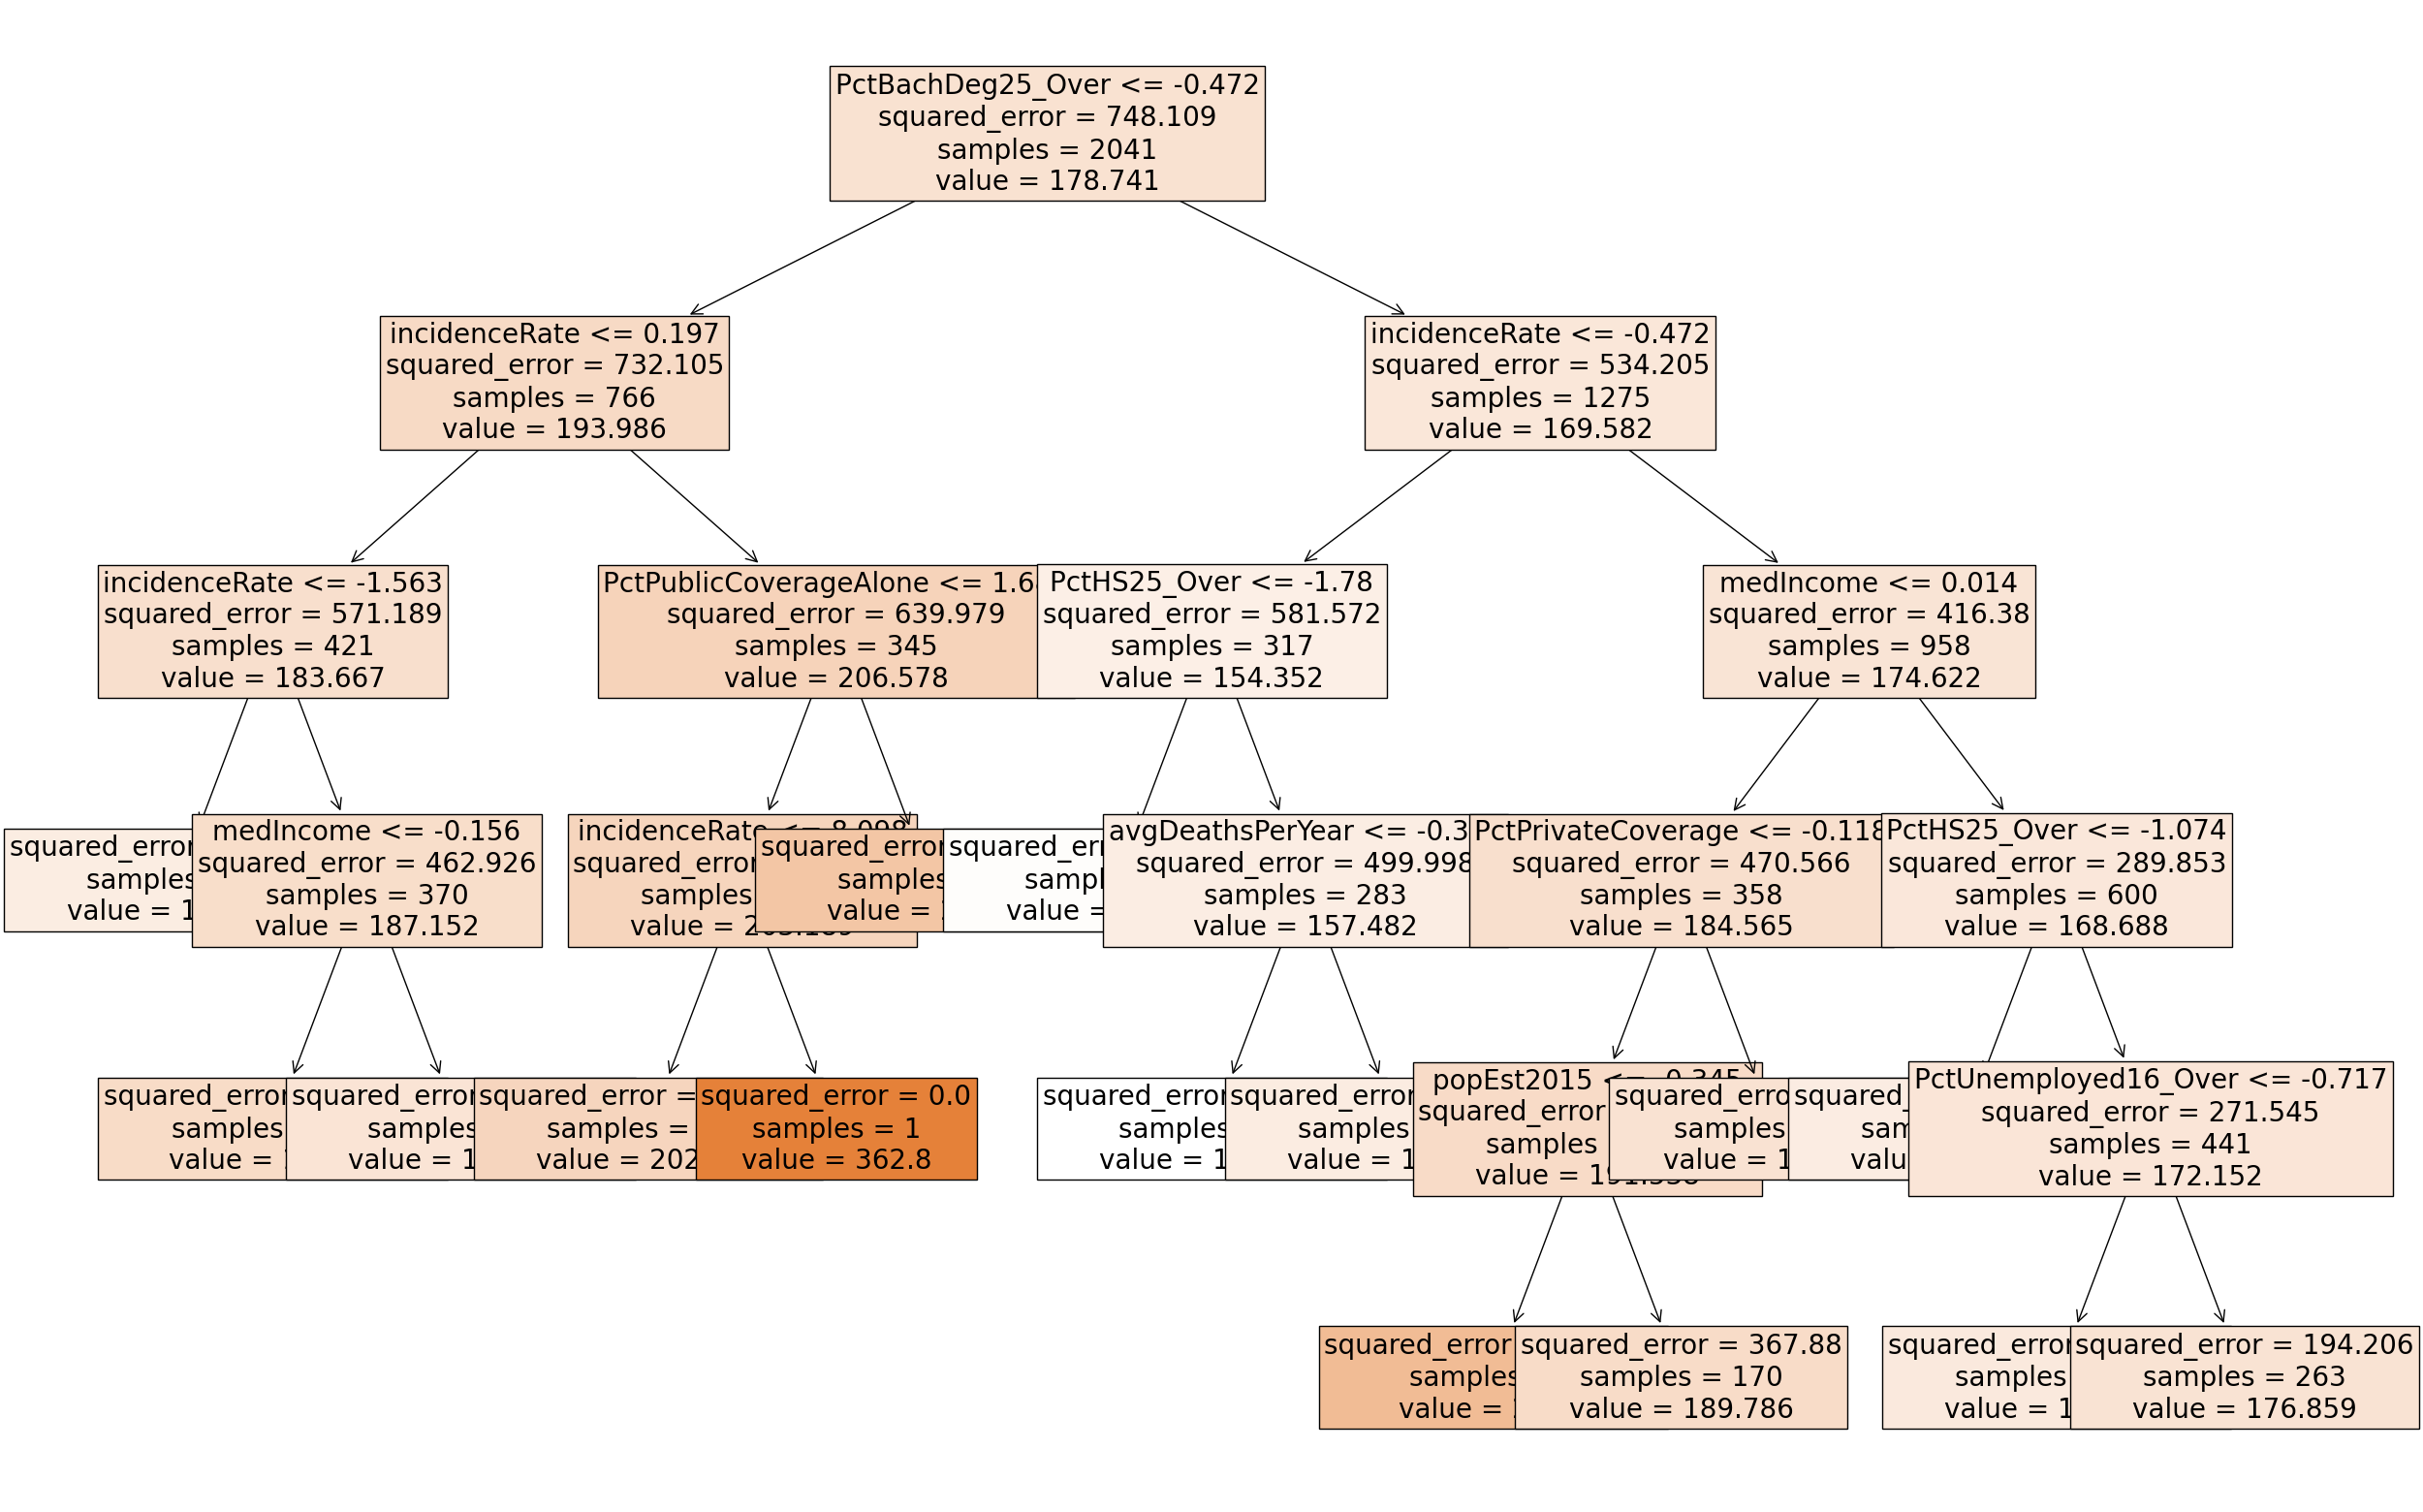

In [84]:
fig = plt.figure(figsize=(30,20))
fig,plot_tree(dt_model1,feature_names=x_train.columns,filled=True,fontsize=20)
plt.show()

In [85]:
rdt_model=RandomForestRegressor()

In [87]:
rand1=RandomizedSearchCV(rdt_model,param_grid)

In [88]:
rand1.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(2, 20),
                                        'max_leaf_nodes': range(2, 20)})

In [89]:
rand1.best_estimator_

RandomForestRegressor(max_depth=7, max_leaf_nodes=19)

In [92]:
rdt_model1=RandomForestRegressor(n_estimators=100,max_depth=7, max_leaf_nodes=19)

In [93]:
rdt_model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_leaf_nodes=19)

In [94]:
pred=rdt_model1.predict(X_test)

In [95]:
evaluate(y_test,pred)

(435.00695090001796, 15.617270969617763, 20.856820249022093)

In [103]:
from sklearn.metrics import accuracy_score

In [106]:
evaluate_model(rdt_model1)

Training accuracy 0.5922953346920095
Testing accuacy 0.4656292474811471


In [ ]:
# bagging classifier

In [107]:
bag_model=BaggingRegressor(base_estimator=dt_model1)

In [108]:
bag_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=18,
                                                      max_leaf_nodes=15))

In [109]:
bag_model.score(X_train,y_train)

0.5518834840781308

In [110]:
pred=bag_model.predict(X_test)

In [111]:
evaluate(y_test,pred)

(454.1449469800433, 16.046013369481205, 21.310676830641565)

In [112]:
evaluate_model(bag_model)

Training accuracy 0.5518834840781308
Testing accuacy 0.4421197717225942


In [ ]:
adaboost

In [113]:
ada_model=AdaBoostRegressor(base_estimator=dt_model1)

In [114]:
ada_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=18,
                                                       max_leaf_nodes=15))

In [115]:
pred=ada_model.predict(X_test)

In [116]:
evaluate(y_test,pred)

(414.44575582512766, 15.19825894719913, 20.357940854249666)

In [117]:
evaluate_model(ada_model)

Training accuracy 0.6664226602503425
Testing accuacy 0.49088700775859473


In [ ]:
# gradient boosting

In [124]:
grad_model=GradientBoostingRegressor()
grad_model.fit(x,y)

GradientBoostingRegressor()

In [125]:
pred=grad_model.predict(X_test)

In [126]:
evaluate(y_test,pred)

(810.0032818510763, 21.9293129622817, 28.46055659770336)

In [127]:
evaluate_model(grad_model)

Training accuracy 0.004374848949350141
Testing accuacy 0.004976673660130659


In [129]:
xgr=xg.XGBRegressor()

In [130]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [131]:
pred=xgr.predict(X_test)

In [132]:
evaluate(y_test,pred)

(444.8472059342874, 15.40814991035234, 21.09140123212034)

In [133]:
evaluate_model(xgr)

Training accuracy 0.9988134240356542
Testing accuacy 0.45354129238810637


In [135]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [145]:
feature=SelectKBest(score_func=mutual_info_regression,k=10)
fit = feature.fit(x, y)
print(fit.scores_)
features = fit.transform(x)

[0.12880276 0.11704722 0.15271331 0.15716939 0.09457464 0.16896274
 0.02412637 0.019993   0.02430262 0.04406984 0.03448971 0.05245258
 0.01164455 0.01984135 0.01260388 0.07767235 0.15844378 0.19337133
 0.11940858 0.09639922 0.14403593 0.08684231 0.07044691 0.1182088
 0.17144904 0.02902645 0.07224365 0.07125331 0.02878824 0.05722522
 0.01770496]


In [153]:
mutual_info = pd.DataFrame(fit.scores_,columns=['Scores'])
#mutual_info['Features']=x.columns
mutual_info.index=x.columns

<AxesSubplot:>

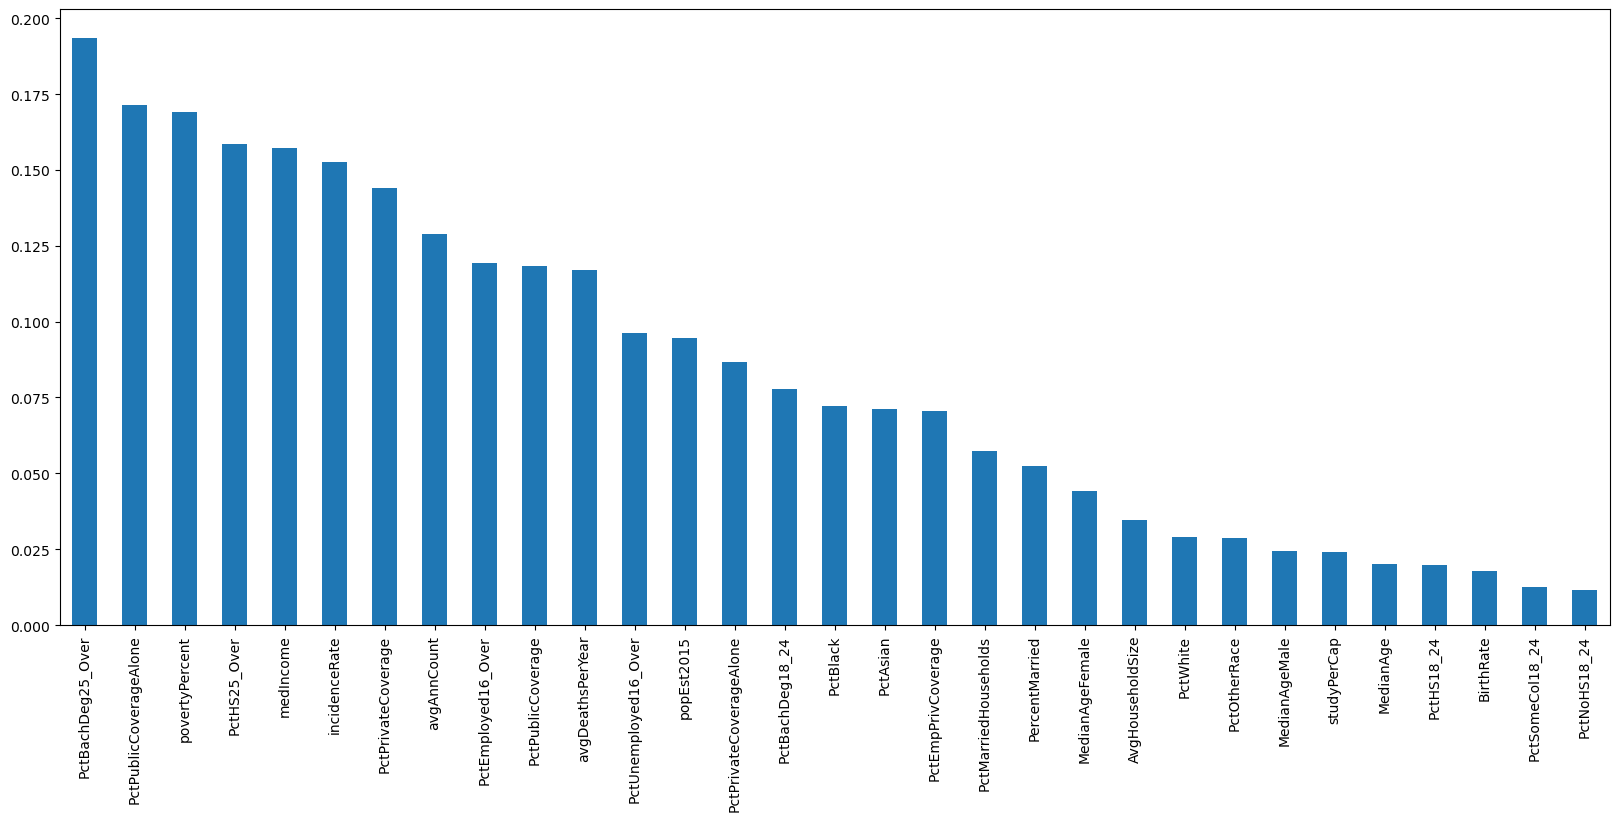

In [154]:
mutual_info['Scores'].sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# pca

In [155]:
from sklearn.decomposition import PCA

In [159]:
df1=scaler.fit_transform(x)

In [160]:
pca=PCA(n_components=0.95,random_state=0)
pca_components=pca.fit_transform(df1)

In [161]:
pca_components

array([[ 2.30924987,  1.21465714,  0.53870177, ...,  0.17139289,
         0.17885128, -0.1825456 ],
       [ 2.08211053,  2.31678126, -2.19675628, ...,  0.40088872,
         0.39350391,  0.77092438],
       [-0.36894736, -1.06920773,  0.75138443, ..., -0.2707092 ,
         0.04200398,  0.50814971],
       ...,
       [ 1.78247714,  1.17420353, -1.69939728, ...,  0.27634972,
        -0.1698218 , -0.16799696],
       [ 2.19145758, -0.88289047, -0.39060896, ..., -0.72766508,
         0.23807191, -0.73126726],
       [ 1.26730194,  1.71422242, -2.35145714, ..., -0.44457376,
        -1.36276123, -1.16728514]])

In [162]:
pca_df=pd.DataFrame(pca_components)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.309250,1.214657,0.538702,0.009005,0.062461,-0.249205,0.184768,0.483139,1.043026,1.289012,0.002053,0.666238,0.536745,-0.995025,-0.431403,0.171393,0.178851,-0.182546
1,2.082111,2.316781,-2.196756,-1.464598,-2.049002,3.053256,-1.364139,-0.153919,-0.052047,0.521531,0.013753,-1.002209,0.885923,-0.534784,-0.286799,0.400889,0.393504,0.770924
2,-0.368947,-1.069208,0.751384,0.751388,-2.224496,-0.446235,-0.626928,-0.578065,1.045945,-0.015209,-0.374585,-0.405029,-0.587018,0.103263,-0.207314,-0.270709,0.042004,0.508150
3,-2.092823,-0.646705,0.928617,0.569643,-0.071895,-0.001447,-0.137068,-0.067010,1.316115,0.199858,0.070880,0.241780,-0.322541,-0.865377,-0.299959,-0.336909,0.404974,0.163006
4,-0.569366,-2.446824,1.273564,0.787903,-1.425338,-0.262668,0.024115,0.083087,0.176289,1.456668,0.092716,-0.998424,-0.127258,-0.353647,-0.395954,0.430204,0.394347,-0.215401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1.772220,-0.889311,0.505399,-0.615958,-0.740879,-0.165070,0.894237,0.089727,-1.445404,-0.196218,0.027200,0.246798,0.100404,0.213686,0.011574,-0.249201,1.013252,-0.539407
3043,1.713805,2.310606,-1.982728,3.588510,0.225396,-0.095576,1.126636,0.392403,0.141996,-1.290115,1.645561,0.880436,1.392056,0.234022,0.170881,0.591713,0.262325,-0.577886
3044,1.782477,1.174204,-1.699397,2.736503,1.637742,0.318947,2.619184,1.588415,2.225548,-0.638851,0.401762,0.011466,-0.122283,-0.551570,-0.997821,0.276350,-0.169822,-0.167997
3045,2.191458,-0.882890,-0.390609,0.781032,1.165450,0.561866,-0.078989,0.126222,-0.582350,0.591150,0.003410,-0.173769,0.111155,-0.171602,-0.507748,-0.727665,0.238072,-0.731267


In [163]:
x1_train,x1_test,y_train,y_test=train_test_split(pca_df,y,test_size=0.33,random_state=42)

In [164]:
linear_model=LinearRegression()
linear_model.fit(x1_train,y_train)

LinearRegression()

In [165]:
pred=linear_model.predict(x1_test)

In [166]:
evaluate(y_test,pred)

(425.0131468824422, 15.404689822012458, 20.6158469843575)

In [168]:
linear_model.score(x1_train,y_train)

0.5074562815883586

In [169]:
xgr1=xg.XGBRegressor()

In [170]:
xgr1.fit(x1_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [171]:
xgr1.score(x1_train,y_train)

0.9942964496926271

In [172]:
pred=xgr1.predict(x1_test)

In [173]:
metrics.r2_score(y_test,pred)

0.40640311796784734